In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.io #
import scipy
from scipy import signal as sgnl

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt


In [96]:
sample_file = scipy.io.loadmat(f'../data/part_1.mat')['p']


In [97]:
sample_file.shape
fs = 125

In [98]:
import iberoSignalPro.preprocesa as ib

In [ ]:
#                   0  subject signal data
#                   |     |      |     |
sample_ppg = sample_file[0,  0][      0,    :]
sample_bbp = sample_file[0,  0][      1,    :]
sample_ECG = sample_file[0,  0][      2,    :]

sample_ECG = ib.baseline_correction_2(sample_ECG, fs = fs)[0]
sample_ppg = ib.baseline_correction_2(sample_ppg, fs = fs)[0]


(50.0, 90.0)

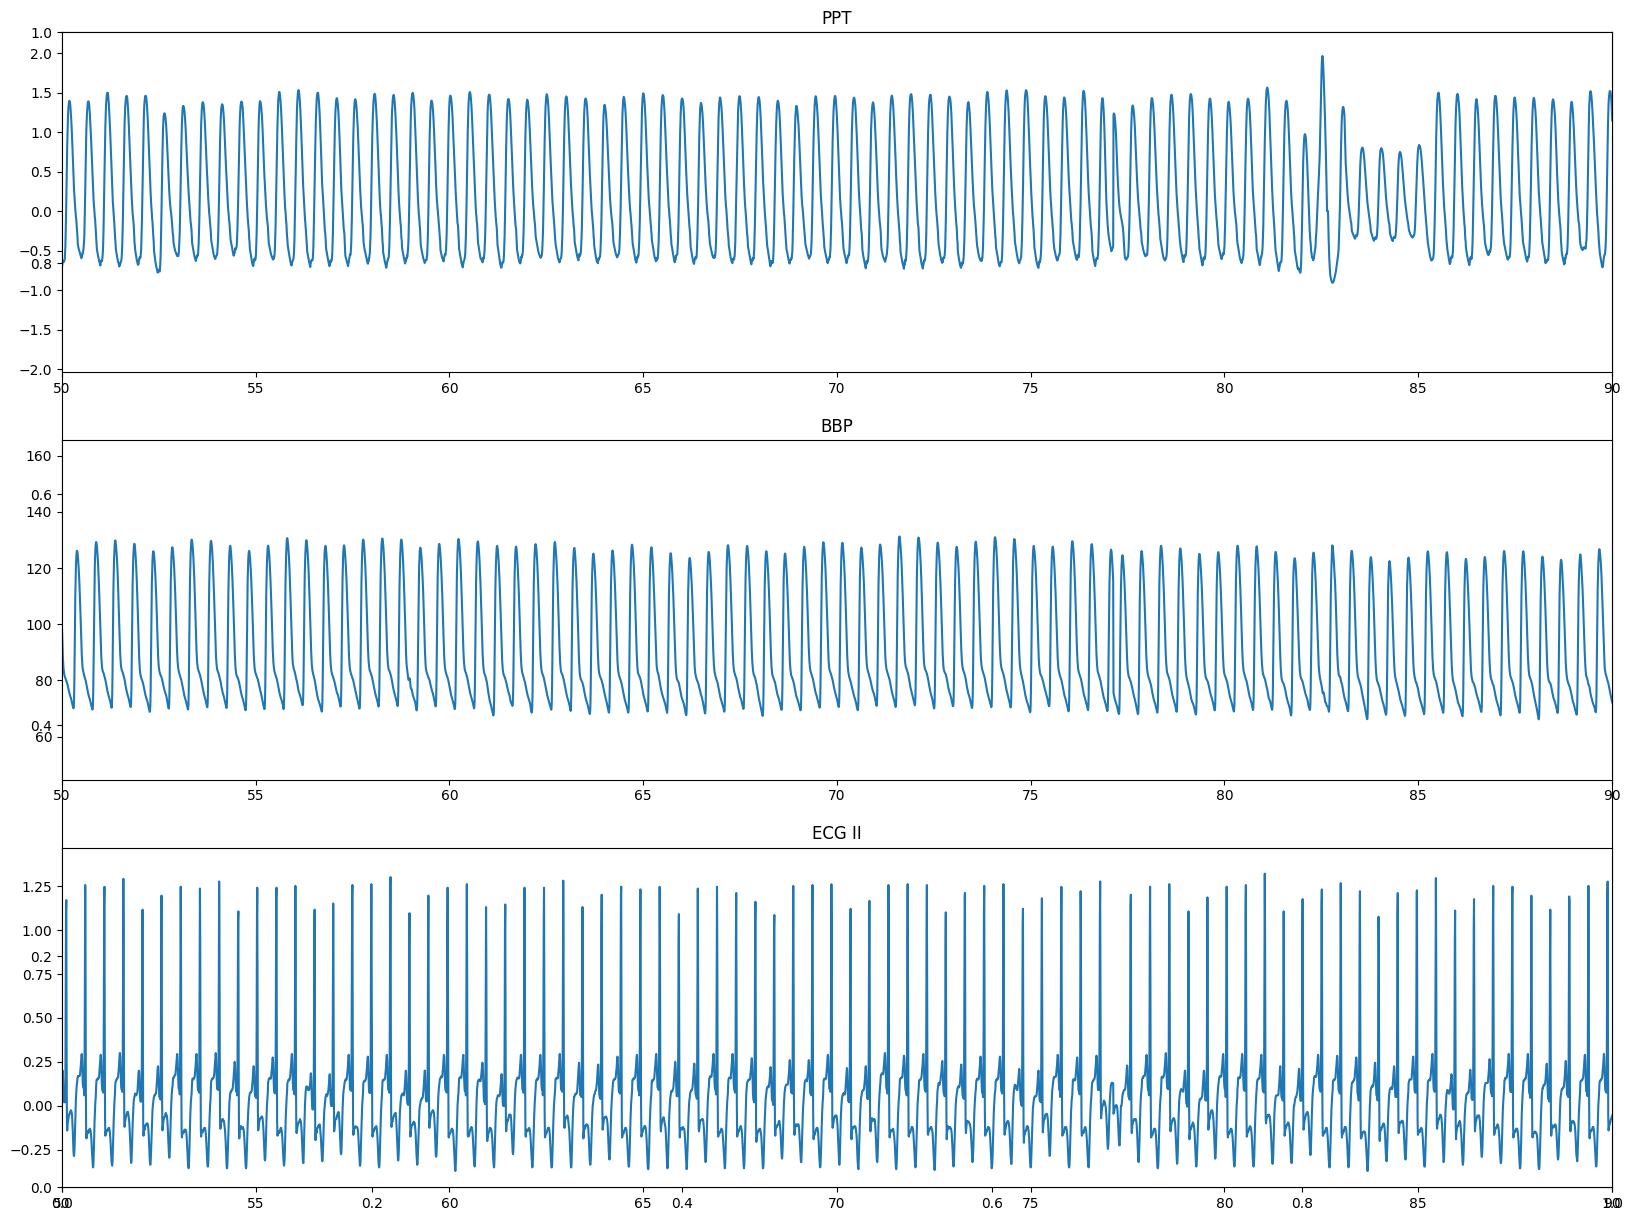

In [185]:

t = np.arange(0, len(sample_ppg)/fs, 1/fs)
min_time = 50
max_time = min_time + 40

plt.figure(figsize=(20, 15))
plt.title('PPT')

plt.subplot(3, 1, 1)
plt.plot(t, sample_ppg)
plt.xlim(min_time, max_time)

plt.subplot(3, 1, 2)
plt.title('BBP')

plt.plot(t, sample_bbp)
plt.xlim(min_time, max_time)

plt.subplot(3, 1, 3)
plt.title('ECG II')

plt.plot(t, sample_ECG)
plt.xlim(min_time, max_time)


ppm =  123.67580077500618
(60,) (3750,)
(62,) (62,)


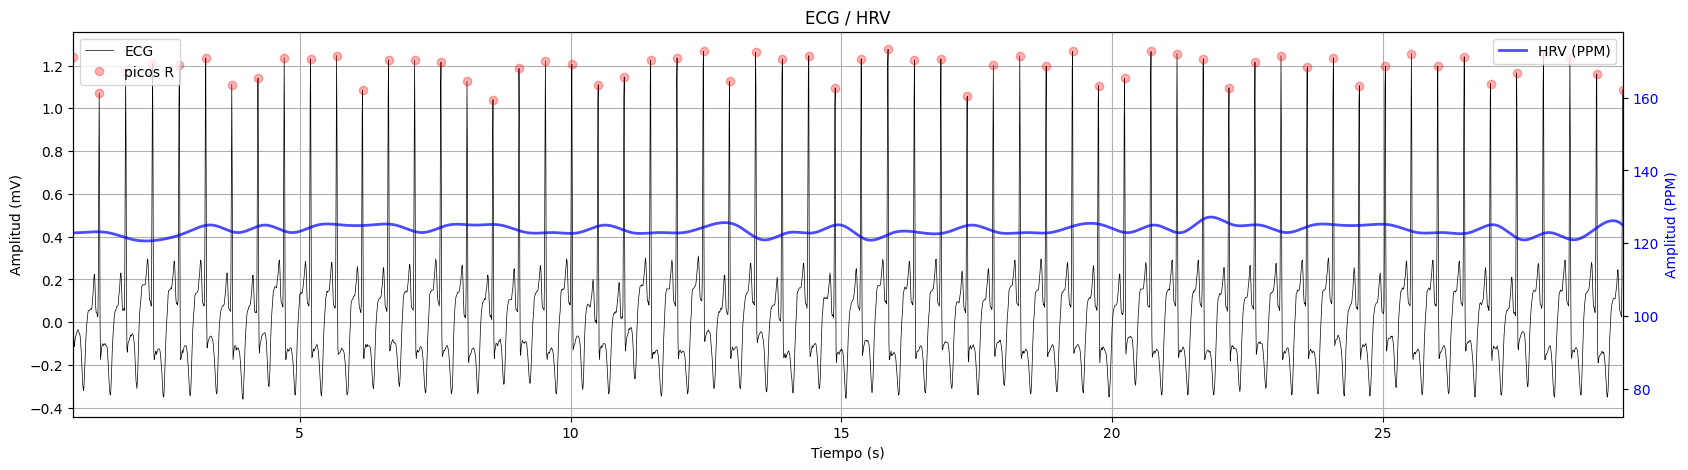

In [207]:
index_ECG, _ = sgnl.find_peaks(sample_ECG[:30*fs], height=0.7, distance=30 )
HRV_1, ppm = ib.getHRV(sample_ECG[:30*fs], fs, index_ECG[1:-1], siPlot=True)

ppm =  123.54168559049235
(59,) (3750,)
(61,) (61,)


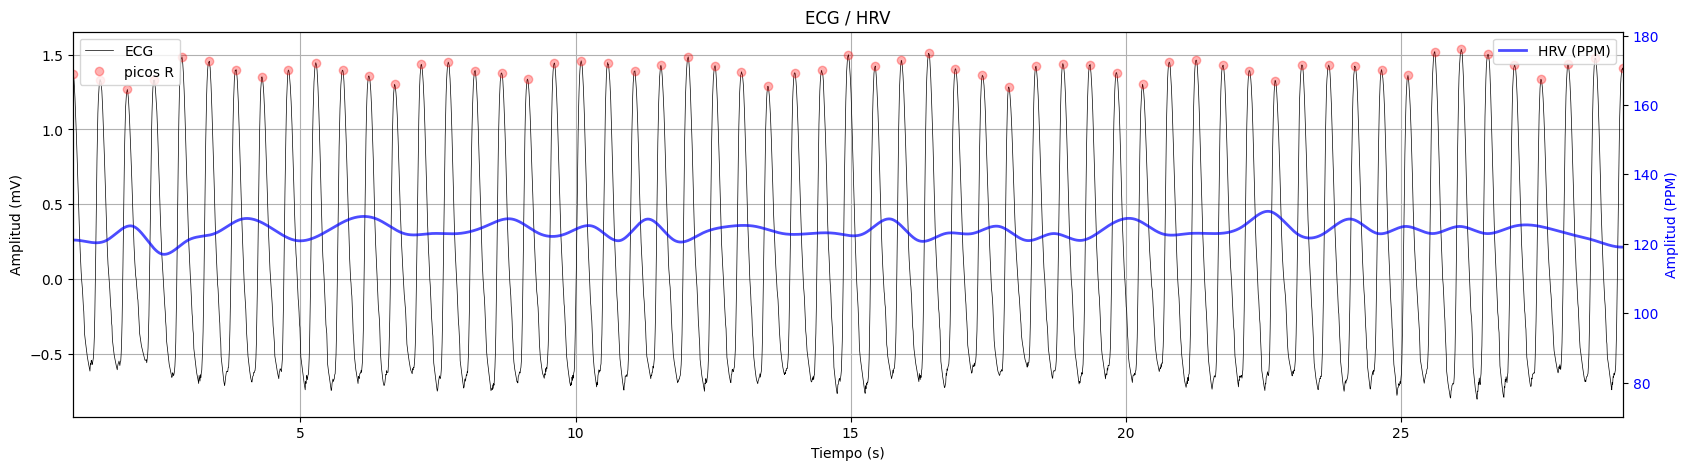

In [208]:
index_PPG, _ = sgnl.find_peaks(sample_ppg[:30*fs], height=0.8, distance=20 )
HRV_2, ppm = ib.getHRV(sample_ppg[:30*fs], fs, index_PPG[1:-1], siPlot=True)

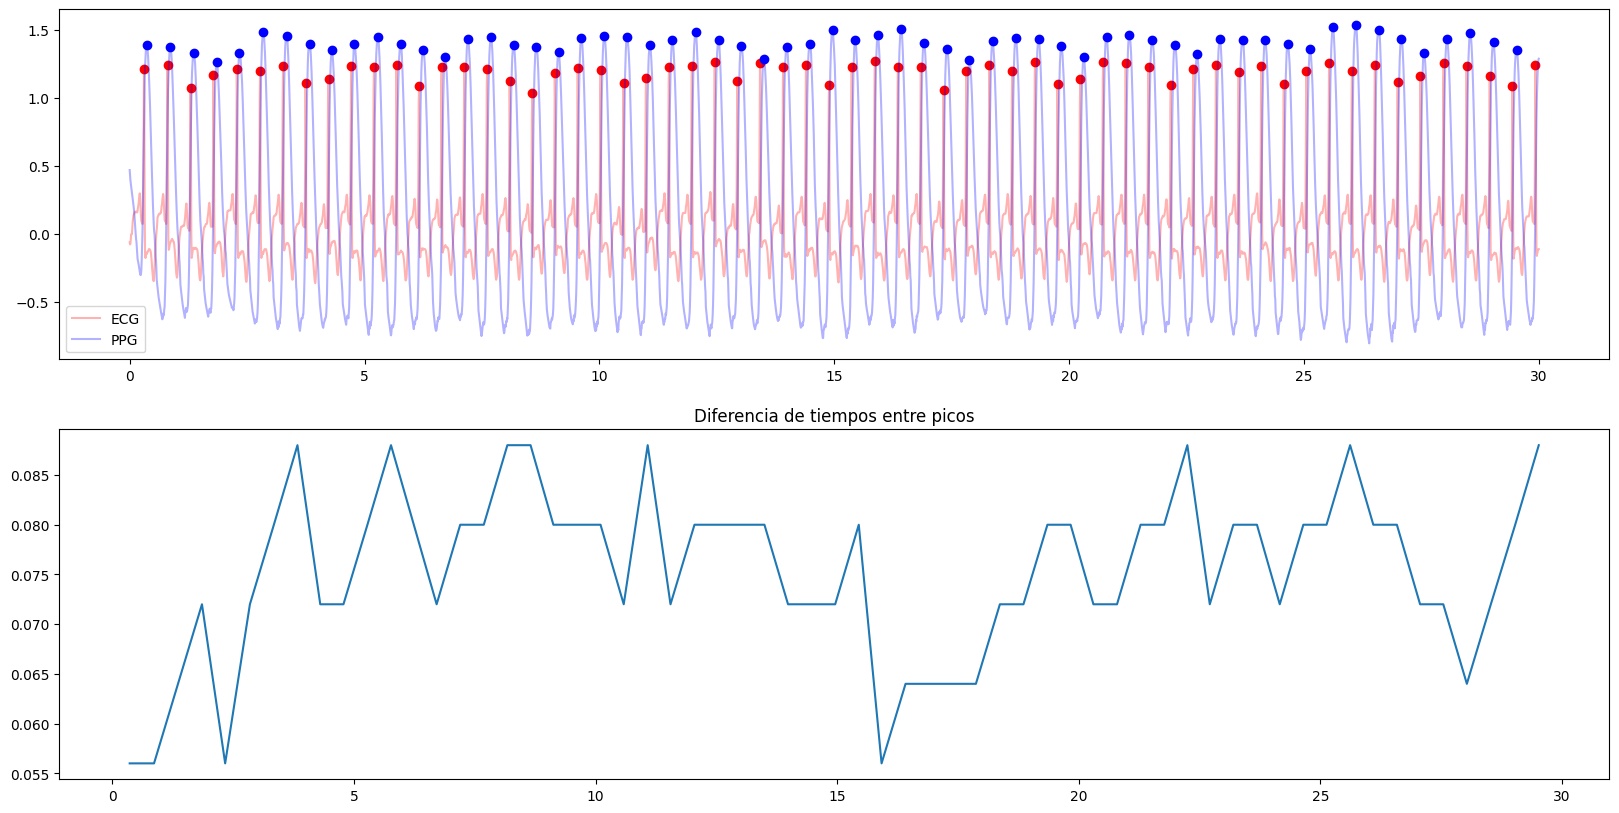

In [220]:
diff_index = t[index_PPG] - t[index_ECG[:-1]]
diff_index.shape

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)

plt.plot(t[index_ECG], sample_ECG[index_ECG], 'ro')
plt.plot(t[:30*fs], sample_ECG[:30*fs], 'r', alpha=0.3, label='ECG')

plt.plot(t[index_PPG], sample_ppg[index_PPG], 'bo')
plt.plot(t[:30*fs], sample_ppg[:30*fs], 'b', alpha=0.3, label='PPG')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Diferencia de tiempos entre picos')
plt.plot(t[index_PPG], diff_index)


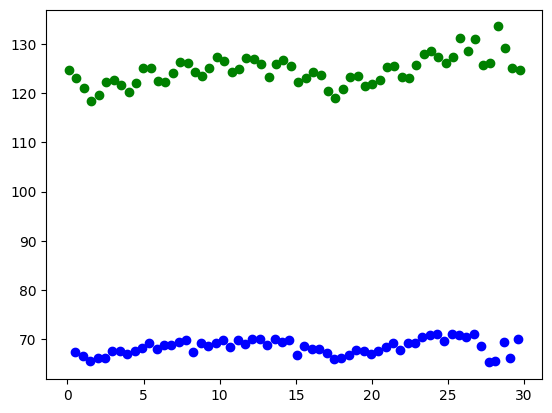

In [232]:
index_sbp, _ = sgnl.find_peaks(sample_bbp[:30*fs], height=100, distance=20 )
index_dbp, _ = sgnl.find_peaks(-sample_bbp[:30*fs], height=-75, distance=20 )

plt.plot(t[index_sbp], sample_bbp[index_sbp], 'go')
plt.plot(t[index_dbp], sample_bbp[index_dbp], 'bo')


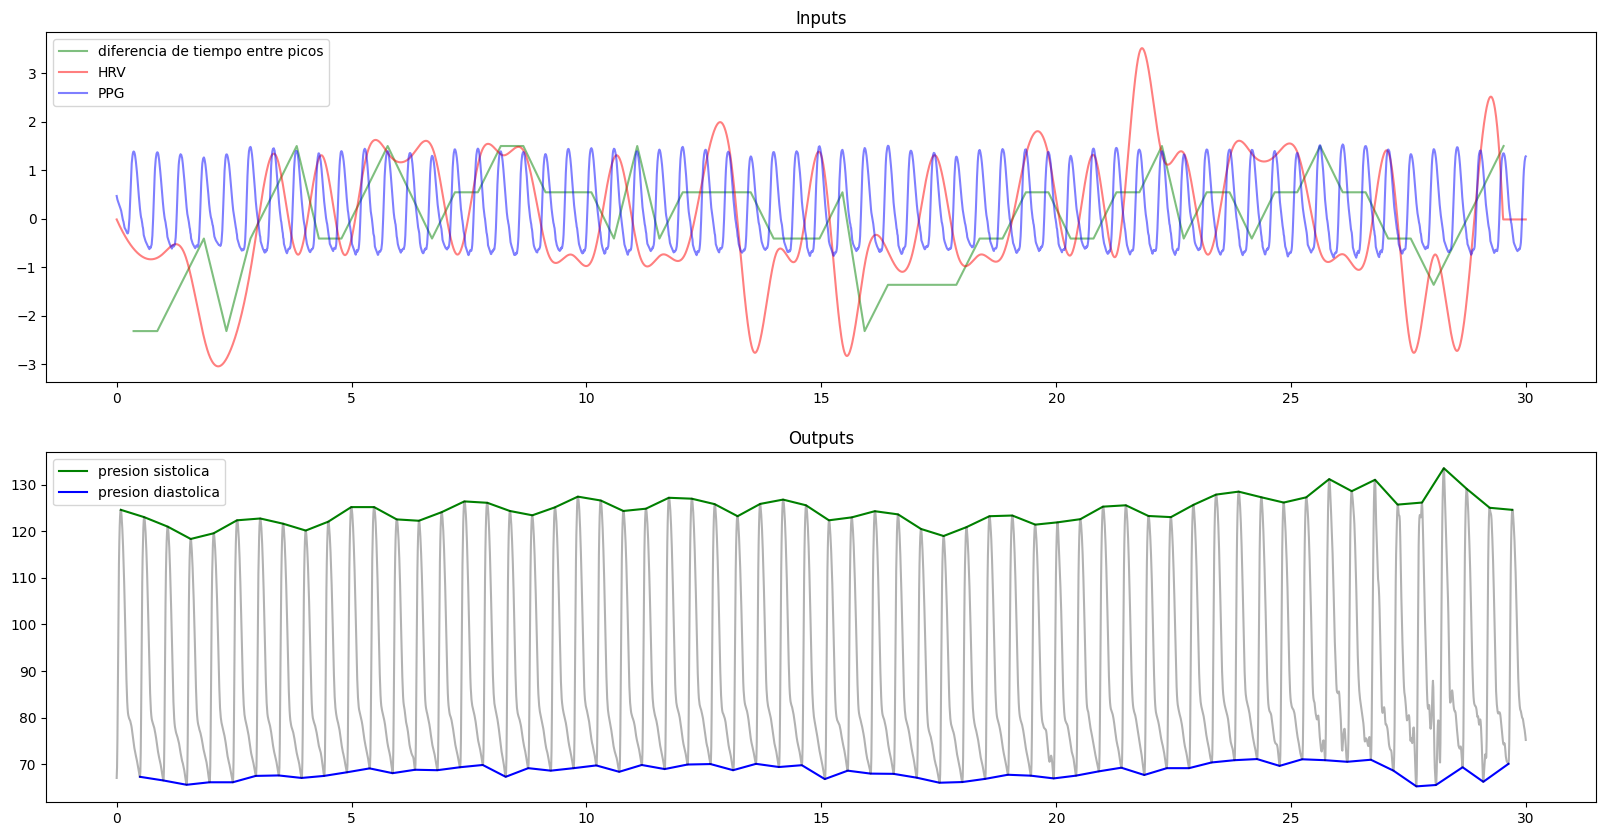

In [248]:

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.title("Inputs")
plt.plot(t[index_PPG], (diff_index-diff_index.mean()) / diff_index.std(), color = 'g', alpha=0.5, label='diferencia de tiempo entre picos')
plt.plot(t[:30*fs], HRV_1 - HRV_1.mean(), color = 'r', alpha=0.5, label='HRV')
plt.plot(t[:30*fs], sample_ppg[:30*fs], color = 'b', alpha=0.5, label='PPG')
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Outputs")
plt.plot(t[index_sbp], sample_bbp[index_sbp], 'g', label='presion sistolica')
plt.plot(t[index_dbp], sample_bbp[index_dbp], 'b', label = 'presion diastolica')
plt.plot(t[:30*fs], sample_bbp[:30*fs], color = 'black', alpha=0.3)
plt.legend()